<a href="https://colab.research.google.com/github/GuysBarash/PoliticalShapley/blob/main/Israeli_politics_shapley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

Mandats per party

In [30]:
prty = dict()
prty['likud'] = 29
prty['new_hope'] = 14
prty['yamina'] = 13
prty['yesh_atid'] = 18
prty['meshutefet'] = 9
prty['shas'] = 8
prty['yahadut_ha_tora'] = 7
prty['israel_beitenu'] = 6
prty['tzionot_datit'] = 5
# prty['meretz'] = 0
prty['avoda'] = 7
prty['kahol_lavan'] = 4

Who won't sit with who (order doesnt matter)

In [31]:
disagree = dict()
disagree['likud'] = ['new_hope', 'kahol_lavan', 'israel_beitenu', 'yesh_atid', 'avoda']
disagree['meshutefet'] = ['likud', 'tzionot_datit', 'yamina']
disagree['yesh_atid'] = ['shas', 'yahadut_ha_tora']

# Code

In [32]:
!git clone https://github.com/GuysBarash/PoliticalShapley.git

fatal: destination path 'PoliticalShapley' already exists and is not an empty directory.


In [33]:
from PoliticalShapley.PoliticalShapley import PoliticalShapley
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
#include if using a jupyter notebook, remove if using a .py file
%matplotlib inline 

In [34]:
shap = PoliticalShapley()
shap.add_parties(prty)
shap.add_restrictions(disagree)
shap.run()

# possible coalitions

In [35]:
df = shap.get_possible_govt()
display(df)

,likud,new_hope,yamina,yesh_atid,meshutefet,shas,yahadut_ha_tora,israel_beitenu,tzionot_datit,avoda,kahol_lavan,Total
0,0,14,13,0,0,8,7,6,5,7,4,64
1,0,14,13,18,0,0,0,0,5,7,4,61
2,0,14,13,18,0,0,0,6,0,7,4,62
3,0,14,13,18,0,0,0,6,5,7,0,63
4,0,14,13,18,0,0,0,6,5,7,4,67
5,29,0,13,0,0,8,7,0,5,0,0,62


# Shapley power

yamina             0.164474
avoda              0.138158
new_hope           0.138158
tzionot_datit      0.116228
yesh_atid          0.092105
kahol_lavan        0.089912
israel_beitenu     0.089912
yahadut_ha_tora    0.072368
shas               0.072368
likud              0.026316
meshutefet         0.000000
dtype: float64

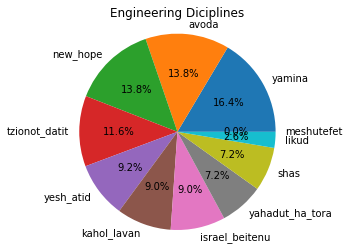

In [38]:
df = shap.get_shapley()
df = df/df.sum()
display(df)

fig, ax = plt.subplots()
ax.pie(df.values, labels=df.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')
plt.show()